Imports

In [1]:
#Librería para Inteligencia Artificial
import tensorflow as tf
#Para arreglos numéricos
import numpy as np

Inicializamos Inputs y Outputs

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Creamos dos capas ocultas (intermedias) con tres neuronas.
La primera capa tiene 3 neuronas y solo recibe un input.
La segunda capa tiene 3 neuronas y recibe un output de cada neurona de la primera capa, por tanto, va a recibir 3 inputs.

In [3]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

Ahora con el modelo listo, el siguiente paso es compilarlo para prepararlo para entrenarlo
Especificamos cómo queremos que procese ciertas matemáticas
Indicaremos el optimizador y la función de pérdida
Para el optimizador usaremos uno llamado Adam, que ajusta los pesos de manera eficiente para que aprenda y no desaprenda
El valor numérico será la tasa de aprendizaje, es decir, cada cuanto va a ir ajustando
Para el optimizador usamos error cuadrático medio -> Poca cantidad de errores grandes es mejor que muchos pequeños.

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Usamos la función fit() para entrenar. Indicamos inputs y outputs y cuantas veces queremos que de.

In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


Función de Pérdida.
Que tan mal están los resultados en cada vuelta que dio.

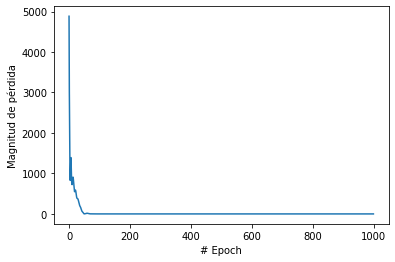

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

La función fue mucho mejor

Vemos cómo fue la predicción

In [9]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Hagamos una predicción!
[array([[-1.3614245e-01, -1.3247757e-04, -7.3861426e-01]], dtype=float32), array([-4.426179 ,  2.4043443, -4.4295263], dtype=float32)]
[array([[ 0.74078715,  1.3320234 ,  0.68559366],
       [-0.15223221, -0.2205906 , -0.44912887],
       [-0.37102845,  0.6702867 ,  1.2262207 ]], dtype=float32), array([ 0.83237094, -3.691925  , -4.101428  ], dtype=float32)]
[array([[-0.00711816],
       [-0.7991261 ],
       [-1.2599353 ]], dtype=float32), array([4.291066], dtype=float32)]


Para saber el peso que asignó y el sesgo.

In [8]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo


NameError: name 'capa' is not defined